In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [613]:
df = pd.read_excel("mugs-analysis-full-incl-demographics.xlsx",sheet_name= "for-cluster-analysis")
df2 = pd.read_excel("mugs-analysis-full-incl-demographics.xlsx",sheet_name= "mugs-full")

In [495]:
len(df.columns[1:])

28

In [475]:
df3 = df2.iloc[28:,-4:-1]
df3.columns = ['P1','P2','P3']
df3 = df3.drop(28)
df3 = df3.reset_index(drop = True)
segmentation_df = pd.concat([df3,df.drop('f', axis = 1)], axis = 1, ignore_index = False)
cols = list(segmentation_df.columns[3:])
#df3.drop('Index', axis =1)
demo = df.iloc[:,-4:]

In [444]:
weighted_avgs = pd.DataFrame()
overalls = []
col = list(segmentation_df.iloc[:,3:].columns.values)

for i in segmentation_df.iloc[:,:3].columns.values:
    overalls.append(sum(segmentation_df[i]))
    for j in col:
        weighted_avgs[f'{i}*{j}'] = [(sum(segmentation_df[j]*segmentation_df[i])/sum(segmentation_df[i])),segmentation_df[j].mean()]

weighted_avgs.loc['Lift'] = np.log10(weighted_avgs.loc[0].values / weighted_avgs.loc[1].values)

In [559]:
P1 = weighted_avgs.iloc[:,:28]
# new_df = pd.DataFrame(columns = segmentation_df.iloc[:,3:].columns)
P2 = weighted_avgs.iloc[:,28:56]
P3 = weighted_avgs.iloc[:,56:]
# new_df = pd.DataFrame(columns = P1.columns)
# new_df.append(weighted_avgs.iloc[1,:28], ignore_index = True)
# # new_df.loc['P/2'] = P2
# # new_df
# #P2
weighted_avgs

,P1*IPr,P1*Iin,P1* ICp,P1* ICl,P1*Icn,P1* IBr,P1*I*pPr30,P1*I*pPr10,P1*I*pPr05,P1*I*pIn0.5,P1*I*pIn1,P1*I*pIn3,P1*I*pCp12,P1*I*pCp20,P1*I*pCp32,P1*I*pClD,P1*I*pClF,P1*I*pClE,P1*I*pCnSl,P1*I*pCnSp,P1*I*pCnLk,P1*I*pBrA,P1*I*pBrB,P1*I*pBrC,P1*income,P1*age,P1*sports,P1*gradschl,P2*IPr,P2*Iin,P2* ICp,P2* ICl,P2*Icn,P2* IBr,P2*I*pPr30,P2*I*pPr10,P2*I*pPr05,P2*I*pIn0.5,P2*I*pIn1,P2*I*pIn3,P2*I*pCp12,P2*I*pCp20,P2*I*pCp32,P2*I*pClD,P2*I*pClF,P2*I*pClE,P2*I*pCnSl,P2*I*pCnSp,P2*I*pCnLk,P2*I*pBrA,P2*I*pBrB,P2*I*pBrC,P2*income,P2*age,P2*sports,P2*gradschl,P3*IPr,P3*Iin,P3* ICp,P3* ICl,P3*Icn,P3* IBr,P3*I*pPr30,P3*I*pPr10,P3*I*pPr05,P3*I*pIn0.5,P3*I*pIn1,P3*I*pIn3,P3*I*pCp12,P3*I*pCp20,P3*I*pCp32,P3*I*pClD,P3*I*pClF,P3*I*pClE,P3*I*pCnSl,P3*I*pCnSp,P3*I*pCnLk,P3*I*pBrA,P3*I*pBrB,P3*I*pBrC,P3*income,P3*age,P3*sports,P3*gradschl
0,18.047792,13.356015,16.360400,18.474953,20.656958,13.116932,18.047792,92.472627,126.334541,13.356015,56.649890,93.492104,60.195305,92.891596,54.302275,18.474953,92.919884,129.324670,20.656958,84.131605,144.598705,71.899339,45.847628,39.438411,60.166276,46.711154,0.470745,0.359619,38.982200,8.963664,12.163142,14.565828,12.400454,12.891389,38.982200,220.564622,272.875400,8.963664,38.659373,62.745646,44.608831,68.056941,41.515779,14.565828,76.960052,101.960796,12.400454,53.653530,86.803179,36.927170,59.796373,56.708477,49.635778,42.849522,0.168137,0.247890,25.957759,11.139006,12.199318,21.128709,16.648585,12.966526,25.957759,130.143038,181.704311,11.139006,45.239052,77.973044,44.349315,68.439493,40.631313,21.128709,104.505252,147.900965,16.648585,65.856829,116.540098,50.520850,46.446746,58.216261,57.743197,46.473295,0.448284,0.448373
1,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707,29.125402,157.475884,203.877814,10.887460,45.935691,76.212219,49.369775,75.848875,45.247588,17.475884,89.035370,122.331190,16.057878,66.254019,112.405145,51.279743,52.019293,51.749196,54.996785,44.983923,0.334405,0.334405,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707,29.125402,157.475884,203.877814,10.887460,45.935691,76.212219,49.369775,75.848875,45.247588,17.475884,89.035370,122.331190,16.057878,66.254019,112.405145,51.279743,52.019293,51.749196,54.996785,44.983923,0.334405,0.334405,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707,29.125402,157.475884,203.877814,10.887460,45.935691,76.212219,49.369775,75.848875,45.247588,17.475884,89.035370,122.331190,16.057878,66.254019,112.405145,51.279743,52.019293,51.749196,54.996785,44.983923,0.334405,0.334405
Lift,-0.207848,0.088750,0.084340,0.024144,0.109378,0.004534,-0.207848,-0.231201,-0.207848,0.088750,0.091049,0.088750,0.086101,0.088027,0.079223,0.024144,0.018546,0.024144,0.109378,0.103747,0.109378,0.146779,-0.054848,-0.117984,0.039016,0.016363,0.148513,0.031570,0.126594,-0.084441,-0.044408,-0.079104,-0.112251,-0.002999,0.126594,0.146322,0.126594,-0.084441,-0.074895,-0.084441,-0.044040,-0.047077,-0.037382,-0.079104,-0.063297,-0.079104,-0.112251,-0.091614,-0.112251,-0.142600,0.060510,0.039744,-0.044542,-0.021111,-0.298609,-0.130014,-0.050005,0.009920,-0.043118,0.082434,0.015689,-0.000475,-0.050005,-0.082793,-0.050005,0.009920,-0.006637,0.009920,-0.046574,-0.044642,-0.046735,0.082434,0.069576,0.082434,0.015689,-0.002611,0.015689,-0.006475,-0.049209,0.051141,0.021164,0.014146,0.127280,0.127366


In [563]:
means = new_df.iloc[1,:]

In [560]:
P1.columns=cols
P2.columns = cols 
P3.columns = cols
new_df = pd.concat([P1,P2,P3])
new_df.index = ['P1','mean','Lift','P2','k','Lift','P3','k','Lift']
new_df = new_df.drop('k')
new_df['gradschl']

P1      0.359619
mean    0.334405
Lift    0.031570
P2      0.247890
Lift   -0.130014
P3      0.448373
Lift    0.127366
Name: gradschl, dtype: float64

In [617]:
pd.DataFrame.to_csv(new_df,'output1.csv')

In [377]:
weighted_avgs.sort_values(by = 1, axis = 1, ascending= False)

,P1*I*pPr05,P3*I*pPr05,P2*I*pPr05,P3*I*pPr10,P2*I*pPr10,P1*I*pPr10,P1*I*pClE,P2*I*pClE,P3*I*pClE,P3*I*pCnLk,P1*I*pCnLk,P2*I*pCnLk,P3*I*pClF,P1*I*pClF,P2*I*pClF,P1*I*pIn3,P3*I*pIn3,P2*I*pIn3,P2*I*pCp20,P3*I*pCp20,P1*I*pCp20,P1*I*pCnSp,P2*I*pCnSp,P3*I*pCnSp,P1*income,P2*income,P3*income,P3*I*pBrB,P2*I*pBrB,P1*I*pBrB,P2*I*pBrC,P1*I*pBrC,P3*I*pBrC,P2*I*pBrA,P1*I*pBrA,P3*I*pBrA,P1*I*pCp12,P2*I*pCp12,P3*I*pCp12,P2*I*pIn1,P3*I*pIn1,P1*I*pIn1,P2*I*pCp32,P3*I*pCp32,P1*I*pCp32,P1*age,P2*age,P3*age,P1*IPr,P2*IPr,P3*IPr,P3*I*pPr30,P2*I*pPr30,P1*I*pPr30,P3*I*pClD,P1*I*pClD,P1* ICl,P2* ICl,P3* ICl,P2*I*pClD,P3*Icn,P1*Icn,P2*Icn,P1*I*pCnSl,P3*I*pCnSl,P2*I*pCnSl,P1* ICp,P2* ICp,P3* ICp,P1* IBr,P2* IBr,P3* IBr,P2*I*pIn0.5,P1*I*pIn0.5,P3*Iin,P2*Iin,P1*Iin,P3*I*pIn0.5,P1*sports,P2*sports,P3*sports,P1*gradschl,P2*gradschl,P3*gradschl
0,126.334541,181.704311,272.875400,130.143038,220.564622,92.472627,129.324670,101.960796,147.900965,116.540098,144.598705,86.803179,104.505252,92.919884,76.960052,93.492104,77.973044,62.745646,68.056941,68.439493,92.891596,84.131605,53.653530,65.856829,60.166276,49.635778,57.743197,46.446746,59.796373,45.847628,56.708477,39.438411,58.216261,36.927170,71.899339,50.520850,60.195305,44.608831,44.349315,38.659373,45.239052,56.649890,41.515779,40.631313,54.302275,46.711154,42.849522,46.473295,18.047792,38.982200,25.957759,25.957759,38.982200,18.047792,21.128709,18.474953,18.474953,14.565828,21.128709,14.565828,16.648585,20.656958,12.400454,20.656958,16.648585,12.400454,16.360400,12.163142,12.199318,13.116932,12.891389,12.966526,8.963664,13.356015,11.139006,8.963664,13.356015,11.139006,0.470745,0.168137,0.448284,0.359619,0.247890,0.448373
1,203.877814,203.877814,203.877814,157.475884,157.475884,157.475884,122.331190,122.331190,122.331190,112.405145,112.405145,112.405145,89.035370,89.035370,89.035370,76.212219,76.212219,76.212219,75.848875,75.848875,75.848875,66.254019,66.254019,66.254019,54.996785,54.996785,54.996785,52.019293,52.019293,52.019293,51.749196,51.749196,51.749196,51.279743,51.279743,51.279743,49.369775,49.369775,49.369775,45.935691,45.935691,45.935691,45.247588,45.247588,45.247588,44.983923,44.983923,44.983923,29.125402,29.125402,29.125402,29.125402,29.125402,29.125402,17.475884,17.475884,17.475884,17.475884,17.475884,17.475884,16.057878,16.057878,16.057878,16.057878,16.057878,16.057878,13.472669,13.472669,13.472669,12.980707,12.980707,12.980707,10.887460,10.887460,10.887460,10.887460,10.887460,10.887460,0.334405,0.334405,0.334405,0.334405,0.334405,0.334405
Lift,0.207848,0.050005,-0.126594,0.082793,-0.146322,0.231201,-0.024144,0.079104,-0.082434,-0.015689,-0.109378,0.112251,-0.069576,-0.018546,0.063297,-0.088750,-0.009920,0.084441,0.047077,0.044642,-0.088027,-0.103747,0.091614,0.002611,-0.039016,0.044542,-0.021164,0.049209,-0.060510,0.054848,-0.039744,0.117984,-0.051141,0.142600,-0.146779,0.006475,-0.086101,0.044040,0.046574,0.074895,0.006637,-0.091049,0.037382,0.046735,-0.079223,-0.016363,0.021111,-0.014146,0.207848,-0.126594,0.050005,0.050005,-0.126594,0.207848,-0.082434,-0.024144,-0.024144,0.079104,-0.082434,0.079104,-0.015689,-0.109378,0.112251,-0.109378,-0.015689,0.112251,-0.084340,0.044408,0.043118,-0.004534,0.002999,0.000475,0.084441,-0.088750,-0.009920,0.084441,-0.088750,-0.009920,-0.148513,0.298609,-0.127280,-0.031570,0.130014,-0.127366


In [604]:
class_seg = segmentation_df.iloc[:,3:-4]
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
ave_within_cluster_mean_sum_of_squares = []
for k in range(2,11):
    random.seed(410014)
    kmeansModel = KMeans(n_clusters=k, n_init=50, max_iter=100)
    kmeansModel.fit(class_seg)
    ave_within_cluster_mean_sum_of_squares.append((kmeansModel.inertia_)/class_seg.shape[0])
    # alternatively you compute it manually as follows

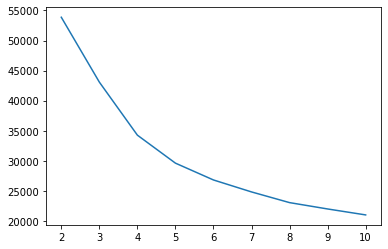

In [605]:
x = [k for k in range(2,11)]
plt.plot(x, ave_within_cluster_mean_sum_of_squares)

In [607]:
#class_seg['segment']= pd.DataFrame(y_pred)
class_seg_2 = pd.concat([class_seg,demo], ignore_index= True, axis = 1)
class_seg_2.drop(class_seg.columns[24:27],axis =1, inplace = True)
class_seg_2.drop(class_seg.columns[31:],axis =1, inplace = True)
class_seg_2.columns = df.columns[1:]
class_seg_2['segment']= y_pred
class_seg = class_seg_2
class_seg

,IPr,Iin,ICp,ICl,Icn,IBr,I*pPr30,I*pPr10,I*pPr05,I*pIn0.5,I*pIn1,I*pIn3,I*pCp12,I*pCp20,I*pCp32,I*pClD,I*pClF,I*pClE,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl,segment
0,5,8,32,7,34,14,5,15,35,8,24,56,32,224,192,7,14,49,34,170,238,98,70,14,63,46,0,0,2
1,6,3,17,10,51,15,6,36,42,3,12,21,17,119,102,10,60,70,51,357,357,105,75,15,65,48,0,0,2
2,55,5,5,8,16,9,55,330,385,5,20,35,35,20,5,8,24,56,16,80,112,9,27,63,38,37,0,0,0
3,12,9,3,40,20,16,12,72,84,9,36,63,21,3,9,40,200,280,20,100,140,112,16,80,77,58,1,1,1
4,56,6,19,9,0,11,56,224,392,6,24,42,19,133,38,9,27,63,0,0,0,33,11,77,44,41,0,0,0
5,9,6,0,57,13,15,9,45,63,6,24,42,0,0,0,57,228,399,13,78,91,45,15,105,79,60,1,1,1
6,39,12,11,7,19,12,39,273,273,12,72,84,11,77,77,7,21,49,19,38,133,36,84,12,40,37,0,0,0
7,33,13,12,25,8,10,33,198,231,13,26,91,12,84,24,25,150,175,8,24,56,50,70,10,43,39,0,0,0
8,14,16,17,9,31,13,14,70,98,16,48,112,17,85,119,9,54,63,31,186,217,91,52,13,59,44,0,0,2
9,40,10,10,10,15,15,40,280,280,10,30,70,60,70,10,10,50,70,15,60,105,45,105,15,46,41,0,0,0


In [609]:
random.seed(410014)
kmeansModel = KMeans(n_clusters=4, n_init=50, max_iter=100)
kmeansModel.fit(class_seg)
segmentClusters = pd.DataFrame(data = kmeansModel.cluster_centers_, columns = class_seg.columns)
y_pred = kmeansModel.predict(class_seg)
segmentClusters.loc['Mean'] = means
for i in range(4):
    segmentClusters.loc[f'LogLifts {i}'] = np.log10(segmentClusters.loc[i].values/segmentClusters.loc['Mean'])
segmentClusters.drop('segment', axis =1)

,IPr,Iin,ICp,ICl,Icn,IBr,I*pPr30,I*pPr10,I*pPr05,I*pIn0.5,I*pIn1,I*pIn3,I*pCp12,I*pCp20,I*pCp32,I*pClD,I*pClF,I*pClE,I*pCnSl,I*pCnSp,I*pCnLk,I*pBrA,I*pBrB,I*pBrC,income,age,sports,gradschl
0,45.702703,8.520270,8.831081,12.601351,11.479730,12.851351,45.702703,250.263514,319.918919,8.520270,35.331081,59.641892,26.236486,46.675676,35.824324,12.601351,61.858108,88.209459,11.479730,44.972973,80.358108,33.905405,53.547297,65.750000,47.527027,42.216216,0.114865,0.283784
1,15.888889,10.873016,8.888889,38.650794,12.809524,12.857143,15.888889,82.460317,111.222222,10.873016,41.904762,76.111111,31.317460,50.063492,28.174603,38.650794,202.698413,270.555556,12.809524,48.603175,89.666667,47.952381,54.968254,49.841270,62.984127,50.000000,0.698413,0.619048
2,13.090909,16.981818,34.600000,11.109091,11.163636,13.018182,13.090909,66.690909,91.636364,16.981818,79.181818,118.872727,152.345455,202.909091,94.418182,11.109091,58.400000,77.763636,11.163636,43.690909,78.145455,75.745455,48.945455,30.145455,59.727273,45.145455,0.418182,0.181818
3,12.733333,11.244444,9.333333,11.644444,41.644444,13.533333,12.733333,68.288889,89.133333,11.244444,45.822222,78.711111,24.866667,52.600000,40.044444,11.644444,56.733333,81.511111,41.644444,188.533333,291.511111,83.177778,46.622222,34.777778,62.600000,46.866667,0.444444,0.288889
Mean,29.125402,10.887460,13.472669,17.475884,16.057878,12.980707,29.125402,157.475884,203.877814,10.887460,45.935691,76.212219,49.369775,75.848875,45.247588,17.475884,89.035370,122.331190,16.057878,66.254019,112.405145,51.279743,52.019293,51.749196,54.996785,44.983923,0.334405,0.334405
LogLifts 0,0.195670,-0.106473,-0.183440,-0.142022,-0.145756,-0.004350,0.195670,0.201183,0.195670,-0.106473,-0.113993,-0.106473,-0.274555,-0.210859,-0.101417,-0.142022,-0.158166,-0.142022,-0.145756,-0.168261,-0.145756,-0.179677,0.012573,0.103992,-0.063397,-0.027578,-0.464086,-0.071285
LogLifts 1,-0.263178,-0.000577,-0.180606,0.344719,-0.098155,-0.004154,-0.263178,-0.280969,-0.263178,-0.000577,-0.039887,-0.000577,-0.197675,-0.180428,-0.205738,0.344719,0.357288,0.344719,-0.098155,-0.134548,-0.098155,-0.029136,0.023948,-0.016315,0.058894,0.045913,0.319839,0.267451
LogLifts 2,-0.347302,0.193058,0.409622,-0.196761,-0.157882,0.001252,-0.347302,-0.373147,-0.347302,0.193058,0.236475,0.193058,0.489368,0.427352,0.319460,-0.196761,-0.183150,-0.196761,-0.157882,-0.180821,-0.157882,0.169411,-0.026452,-0.234682,0.035835,0.001557,0.097092,-0.264636
LogLifts 3,-0.359330,0.014011,-0.159417,-0.176320,0.413869,0.018106,-0.359330,-0.362864,-0.359330,0.014011,-0.001074,0.014011,-0.297844,-0.158963,-0.053053,-0.176320,-0.195724,-0.176320,0.413869,0.454176,0.413869,0.210061,-0.047571,-0.172602,0.056237,0.017807,0.123545,-0.063542
